In [43]:
import pandas as pd
pd.get_option("display.max_columns")
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [30]:
# To Import Data from google drive (authentication needed)
from google.colab import drive 
drive.mount('/content/gdrive')

Data = pd.read_csv('gdrive/MyDrive/Personal Data Science Projects/Flu Shot Learning/training_set_features.csv')
Data_target = pd.read_csv('gdrive/MyDrive/Personal Data Science Projects/Flu Shot Learning/training_set_labels.csv')
Data_target.drop(columns='respondent_id',inplace=True)
Data_Graph = pd.concat( [Data,Data_target], axis=1 )
Data_Graph.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  rent_or_own   employment_status  \
0                    1.0  ...          Own  Not in Labor Force   
1                    1.0  ...         Rent            Employed   
2                    0.0  ...          Own            Employed   
3                    0.0  ...         Rent  Not in Labor Force   
4                    1.0  ...          Own            Employed   

   hhs_geo_region                census_msa  household_adults  \
0        oxchjgsf                   Non-MSA               0.0   
1        bhuqouqj  MSA, Not Principle  City               0.0   
2        qufhixun  MSA, Not Principle  City               2.0   
3        lrircsnp       MSA, Principle City               0.0   
4        qufhixun  MSA, Not Principle  City               1.0   

   household_children  employment_industry  employment_occupation  \
0                 0.0                  NaN                    NaN   
1                 0.0             pxcmvdjn               xgwztkwe   
2                 0.0             rucpziij               xtkaffoo   
3                 0.0                  NaN                    NaN   
4                 0.0             wxleyezf               emcorrxb   

   h1n1_vaccine  seasonal_vaccine  
0             0                 0  
1             0                 1  
2             0                 0  
3             0                 1  
4             0                 0  

[5 rows x 38 columns]

In [40]:
Data_Graph.groupby( by='h1n1_knowledge' ).count()

respondent_id  h1n1_concern  behavioral_antiviral_meds  \
h1n1_knowledge                                                           
0.0                      2506          2457                       2493   
1.0                     14598         14575                      14559   
2.0                      9487          9477                       9473   

                behavioral_avoidance  behavioral_face_mask  \
h1n1_knowledge                                               
0.0                             2466                  2501   
1.0                            14495                 14591   
2.0                             9428                  9482   

                behavioral_wash_hands  behavioral_large_gatherings  \
h1n1_knowledge                                                       
0.0                              2496                         2487   
1.0                             14580                        14550   
2.0                              9476                         9470   

                behavioral_outside_home  behavioral_touch_face  \
h1n1_knowledge                                                   
0.0                                2479                   2475   
1.0                               14569                  14537   
2.0                                9467                   9457   

                doctor_recc_h1n1  ...  employment_status  hhs_geo_region  \
h1n1_knowledge                    ...                                      
0.0                         2227  ...               2179            2506   
1.0                        13410  ...              13848           14598   
2.0                         8806  ...               9110            9487   

                census_msa  household_adults  household_children  \
h1n1_knowledge                                                     
0.0                   2506              2445                2445   
1.0                  14598             14460               14460   
2.0                   9487              9437                9437   

                employment_industry  employment_occupation  h1n1_vaccine  \
h1n1_knowledge                                                             
0.0                             691                    681          2506   
1.0                            7150                   7081         14598   
2.0                            5497                   5436          9487   

                seasonal_vaccine  behavioral_score_sum  
h1n1_knowledge                                          
0.0                         2506                  2506  
1.0                        14598                 14598  
2.0                         9487                  9487  

[3 rows x 38 columns]

In [41]:
Data_Graph.groupby( by='h1n1_concern' ).count()

respondent_id  h1n1_knowledge  behavioral_antiviral_meds  \
h1n1_concern                                                             
0.0                    3296            3268                       3289   
1.0                    8153            8125                       8133   
2.0                   10575           10546                      10558   
3.0                    4591            4570                       4569   

              behavioral_avoidance  behavioral_face_mask  \
h1n1_concern                                               
0.0                           3248                  3293   
1.0                           8095                  8148   
2.0                          10510                 10574   
3.0                           4560                  4585   

              behavioral_wash_hands  behavioral_large_gatherings  \
h1n1_concern                                                       
0.0                            3289                         3278   
1.0                            8138                         8132   
2.0                           10565                        10542   
3.0                            4584                         4579   

              behavioral_outside_home  behavioral_touch_face  \
h1n1_concern                                                   
0.0                              3284                   3271   
1.0                              8133                   8108   
2.0                             10550                  10540   
3.0                              4575                   4574   

              doctor_recc_h1n1  ...  employment_status  hhs_geo_region  \
h1n1_concern                    ...                                      
0.0                       3031  ...               3056            3296   
1.0                       7623  ...               7773            8153   
2.0                       9676  ...              10081           10575   
3.0                       4144  ...               4259            4591   

              census_msa  household_adults  household_children  \
h1n1_concern                                                     
0.0                 3296              3252                3252   
1.0                 8153              8090                8090   
2.0                10575             10493               10493   
3.0                 4591              4533                4533   

              employment_industry  employment_occupation  h1n1_vaccine  \
h1n1_concern                                                             
0.0                          1624                   1612          3296   
1.0                          4360                   4294          8153   
2.0                          5510                   5470         10575   
3.0                          1867                   1847          4591   

              seasonal_vaccine  behavioral_score_sum  
h1n1_concern                                          
0.0                       3296                  3296  
1.0                       8153                  8153  
2.0                      10575                 10575  
3.0                       4591                  4591  

[4 rows x 38 columns]

In [55]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=True)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='h1n1_concern' ).count().index, y=Data_Graph.groupby( by='h1n1_concern' ).count()['respondent_id'].values,name='H1N1 Concern'), 1, 1)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='h1n1_knowledge' ).count().index, y=Data_Graph.groupby( by='h1n1_knowledge' ).count()['respondent_id'].values,name='H1N1 Knowledge'),  1, 2)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.show()

In [31]:
Data_Graph['behavioral_score_sum'] = Data_Graph[['behavioral_antiviral_meds', 'behavioral_avoidance','behavioral_face_mask', 'behavioral_wash_hands',
                               'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face']].sum(axis='columns')
Data_Graph.groupby( by='behavioral_score_sum' ).count()

respondent_id  h1n1_concern  h1n1_knowledge  \
behavioral_score_sum                                                
0.0                            2109          2092            2090   
1.0                            2715          2699            2694   
2.0                            4584          4569            4563   
3.0                            7256          7236            7236   
4.0                            4331          4320            4313   
5.0                            4504          4497            4490   
6.0                            1037          1031            1034   
7.0                             171           171             171   

                      behavioral_antiviral_meds  behavioral_avoidance  \
behavioral_score_sum                                                    
0.0                                        2105                  2078   
1.0                                        2705                  2646   
2.0                                        4576                  4529   
3.0                                        7235                  7230   
4.0                                        4318                  4306   
5.0                                        4492                  4502   
6.0                                        1034                  1037   
7.0                                         171                   171   

                      behavioral_face_mask  behavioral_wash_hands  \
behavioral_score_sum                                                
0.0                                   2106                   2097   
1.0                                   2713                   2709   
2.0                                   4582                   4571   
3.0                                   7254                   7249   
4.0                                   4327                   4328   
5.0                                   4498                   4503   
6.0                                   1037                   1037   
7.0                                    171                    171   

                      behavioral_large_gatherings  behavioral_outside_home  \
behavioral_score_sum                                                         
0.0                                          2103                     2103   
1.0                                          2701                     2706   
2.0                                          4567                     4563   
3.0                                          7223                     7229   
4.0                                          4314                     4313   
5.0                                          4504                     4503   
6.0                                          1037                     1037   
7.0                                           171                      171   

                      behavioral_touch_face  ...  rent_or_own  \
behavioral_score_sum                         ...                
0.0                                    2097  ...         1924   
1.0                                    2678  ...         2488   
2.0                                    4537  ...         4277   
3.0                                    7239  ...         6751   
4.0                                    4316  ...         3979   
5.0                                    4504  ...         4174   
6.0                                    1037  ...          935   
7.0                                     171  ...          137   

                      employment_status  hhs_geo_region  census_msa  \
behavioral_score_sum                                                  
0.0                                1968            2109        2109   
1.0                                2556            2715        2715   
2.0                                4360            4584        4584   
3.0                                6882            7256        7256   
4.0                                4103            

In [39]:
fig = px.bar( x=Data_Graph.groupby( by='behavioral_score_sum' ).count().index, y=Data_Graph.groupby( by='behavioral_score_sum' ).count()['respondent_id'].values,
              title='Behavioral Score (Sum of all behavioral paramaters)' )
fig.show()

In [5]:
Data_Graph.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'respondent_id', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

In [61]:
fig = make_subplots(rows=1, cols=6, shared_yaxes=True)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='opinion_h1n1_vacc_effective' ).count().index, y=Data_Graph.groupby( by='opinion_h1n1_vacc_effective' ).count()['respondent_id'].values,name='Opinion H1N1 Vaccine_Effectiveness'), 1, 1)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='opinion_h1n1_risk' ).count().index, y=Data_Graph.groupby( by='opinion_h1n1_risk' ).count()['respondent_id'].values,name='Opinion on H1N1 Risk'),  1, 2)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='opinion_h1n1_sick_from_vacc' ).count().index, y=Data_Graph.groupby( by='opinion_h1n1_sick_from_vacc' ).count()['respondent_id'].values,name='Opinion Sick from H1N1 Vaccine'),  1, 3)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='opinion_seas_vacc_effective' ).count().index, y=Data_Graph.groupby( by='opinion_seas_vacc_effective' ).count()['respondent_id'].values,name='Opinion on Seasonal Vaccine Effective'),  1, 4)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='opinion_seas_risk' ).count().index, y=Data_Graph.groupby( by='opinion_seas_risk' ).count()['respondent_id'].values,name='Opinion on Seasonal Risk'),  1, 5)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='opinion_seas_sick_from_vacc' ).count().index, y=Data_Graph.groupby( by='opinion_seas_sick_from_vacc' ).count()['respondent_id'].values,name='Opinion on Sick from Seasonal Vaccine'),  1, 6)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True, width=2400)
fig.show()

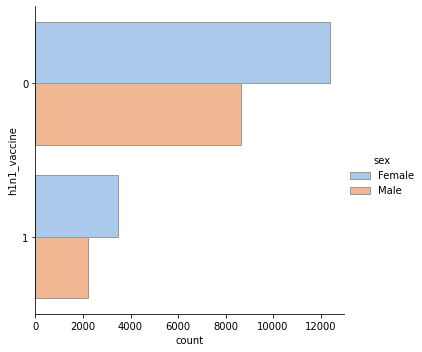

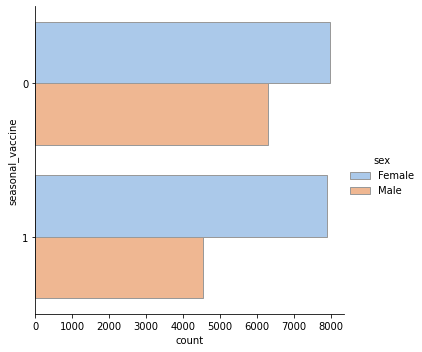

In [6]:
sns.catplot(y="h1n1_vaccine", hue="sex", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)
sns.catplot(y="seasonal_vaccine", hue="sex", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)

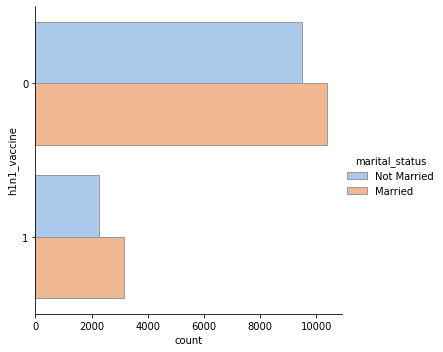

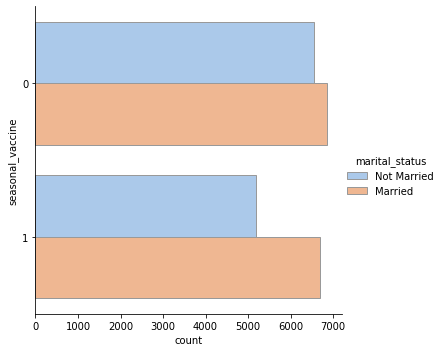

In [7]:
sns.catplot(y="h1n1_vaccine", hue="marital_status", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)
sns.catplot(y="seasonal_vaccine", hue="marital_status", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)

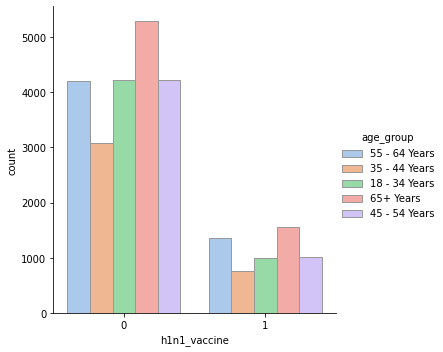

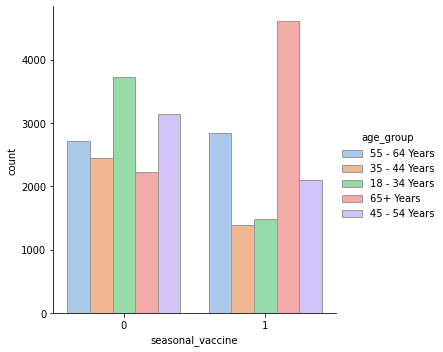

In [8]:
sns.catplot(x="h1n1_vaccine", hue="age_group", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)
sns.catplot(x="seasonal_vaccine", hue="age_group", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)

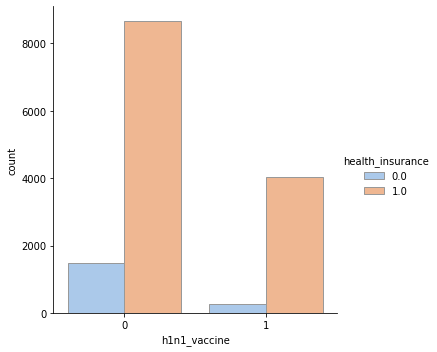

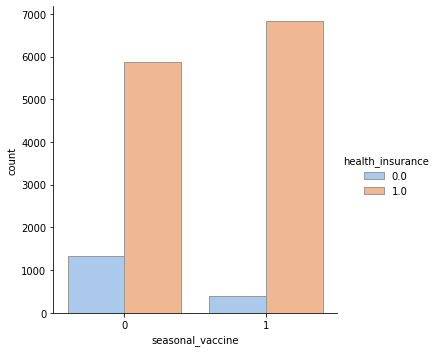

In [56]:
sns.catplot(x="h1n1_vaccine", hue="health_insurance", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)
sns.catplot(x="seasonal_vaccine", hue="health_insurance", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)

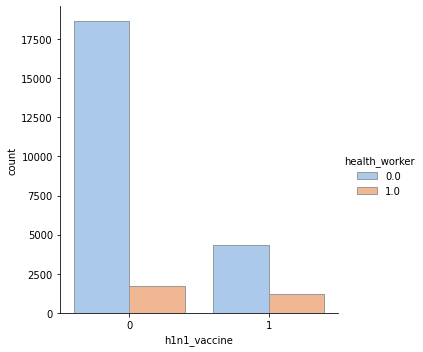

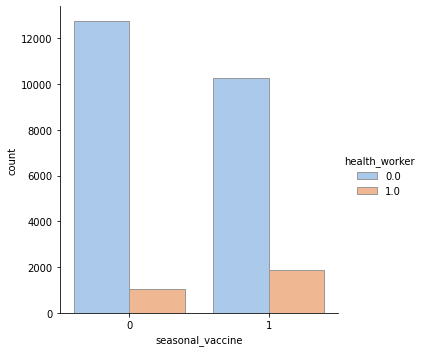

In [57]:
sns.catplot(x="h1n1_vaccine", hue="health_worker", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)
sns.catplot(x="seasonal_vaccine", hue="health_worker", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)

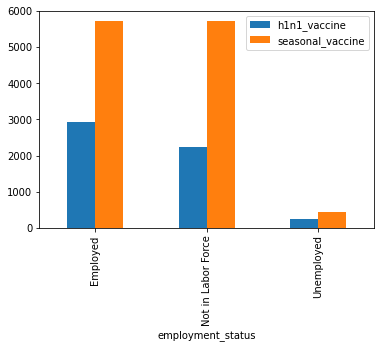

In [10]:
Data_Graph.groupby( by='employment_status' ).sum()[['h1n1_vaccine','seasonal_vaccine']].reset_index().plot( x='employment_status', y=['h1n1_vaccine','seasonal_vaccine'], kind='bar'  )

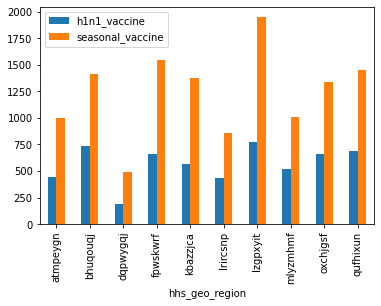

In [11]:
Data_Graph.groupby( by='hhs_geo_region' ).sum()[['h1n1_vaccine','seasonal_vaccine']].reset_index().plot( x='hhs_geo_region', y=['h1n1_vaccine','seasonal_vaccine'], kind='bar'  )

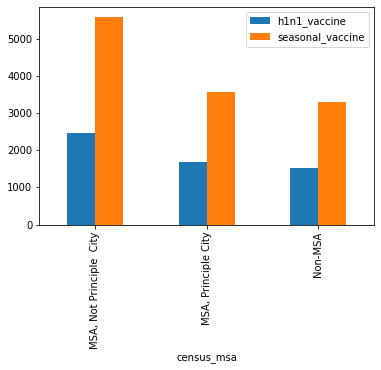

In [12]:
Data_Graph.groupby( by='census_msa' ).sum()[['h1n1_vaccine','seasonal_vaccine']].reset_index().plot( x='census_msa', y=['h1n1_vaccine','seasonal_vaccine'], kind='bar'  )

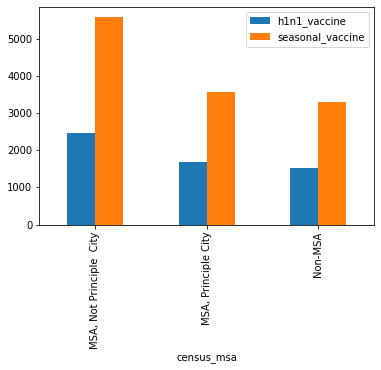

In [13]:
Data_Graph.groupby( by='census_msa' ).sum()[['h1n1_vaccine','seasonal_vaccine']].reset_index().plot( x='census_msa', y=['h1n1_vaccine','seasonal_vaccine'], kind='bar'  )

In [15]:
import plotly.express as px
fig = px.bar(x=Data_Graph.groupby( by='census_msa' ).sum().index, y=Data_Graph.groupby( by='census_msa' ).sum()["h1n1_vaccine"], barmode='group',
             height=500)
# fig.update_layout( title='h1n1 Vaccine Count ', x_title='Census MSA', y_title='H1N1 Vaccine Count' )
fig.show()